
Graph Theory (Lee Method)
============================================

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets


# Using the NiftiLabelsMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from brainconn import degree, centrality, clustering, core, distance, modularity, utils
from nilearn import plotting 
from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures
from nilearn import datasets

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


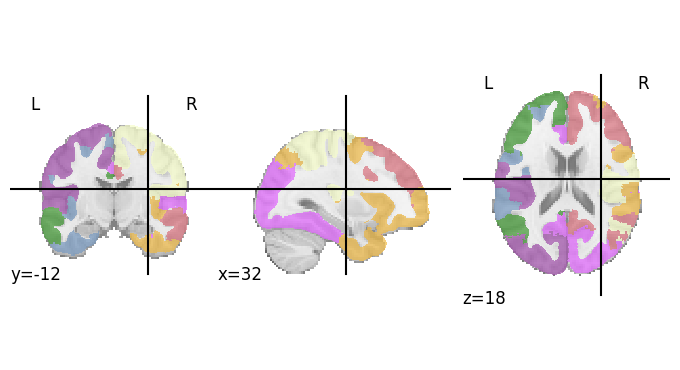

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

In [3]:
# labels

In [4]:
#%% Load the functional datasets (hc and sci, or sci_c and sci_t) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data'

analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY

# Analysis Grouping		

# PreFES PreNFES MidFES MidNFES PostFES PostNFES
 
# Initial Exp
# PreFES	vs	PreNFES 
# PreFES	vs	PostFES

if analysis == "ALL":
    group = ['pre_fes', 'pre_nfes', 'mid_fes', 'mid_nfes', 'post_fes', 'post_nfes']; 
    group_label = ['Pre FES', 'Pre Non-FES', 'Post FES']
#     group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']

elif analysis == "Group":
    group = ['fes', 'nfes']; group_label = ['FES', 'Non-FES']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


### Load data from Group 1

In [5]:
#=============================================================================
ts_g1, ts_g2, ts_g3, ts_g4, ts_g5, ts_g6 = [], [], [], [], [], []

nii_g1 = sorted(os.listdir(data_path+'/'+ group[0]))
nii_g1 = [x for x in nii_g1 if x.startswith('errts')] # remove not-nifti elements
nii_g2 = sorted(os.listdir(data_path+'/'+ group[1]))
nii_g2 = [x for x in nii_g2 if x.startswith('errts')] # remove not-nifti elements
nii_g3 = sorted(os.listdir(data_path+'/'+ group[2]))
nii_g3 = [x for x in nii_g3 if x.startswith('errts')] # remove not-nifti elements
nii_g4 = sorted(os.listdir(data_path+'/'+ group[3]))
nii_g4 = [x for x in nii_g4 if x.startswith('errts')] # remove not-nifti elements
nii_g5 = sorted(os.listdir(data_path+'/'+ group[4]))
nii_g5 = [x for x in nii_g5 if x.startswith('errts')] # remove not-nifti elements
nii_g6 = sorted(os.listdir(data_path+'/'+ group[5]))
nii_g6 = [x for x in nii_g6 if x.startswith('errts')] # remove not-nifti elements


# reading the nifti files
for nii in nii_g1: # 1st session PreFES
    ts_g1.append(masker.fit_transform(data_path + '/'+ group[0] + '/'+ nii)) # ts_g = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Pre_FES dataset: '+'{}\n'.format(nii))
for nii in nii_g2: # 1st session Pre_NFES
    ts_g2.append(masker.fit_transform(data_path + '/'+ group[1] + '/'+ nii)) # ts_g2 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Pre_NFES dataset:'+'{}\n'.format(nii))
for nii in nii_g3: # 2nd session Mid_FES
    ts_g3.append(masker.fit_transform(data_path + '/'+ group[2] + '/'+ nii)) # ts_g3 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Mid_FES dataset:'+'{}\n'.format(nii))
for nii in nii_g4: # 2nd session Mid_FES
    ts_g4.append(masker.fit_transform(data_path + '/'+ group[3] + '/'+ nii)) # ts_g4 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Mid_NFES dataset: '+'{}\n'.format(nii))
for nii in nii_g5: # 3rd session Post_FES
    ts_g5.append(masker.fit_transform(data_path + '/'+ group[4] + '/'+ nii)) # ts_g5 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Post_FES dataset:'+'{}\n'.format(nii))
for nii in nii_g6: # 3rd session Post_NFES
    ts_g6.append(masker.fit_transform(data_path + '/'+ group[5] + '/'+ nii)) # ts_g6 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Post_NFES dataset:'+'{}\n'.format(nii))
    
# saving numpy arrays (timeseries)
# /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0], ts_g1) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1], ts_g2)   
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2], ts_g3) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3], ts_g4) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4], ts_g5)   
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5], ts_g6)

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_FES dataset: errts.scifes03a.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.1s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_FES dataset: errts.scifes03a.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]2.0s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cac

[Memory]21.3s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_NFES dataset:errts.scifes14a.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]22.2s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_FES dataset:errts.scifes03b.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]23.2s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_FES dataset:errts.scifes03b.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_da

[Memory]42.2s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_NFES dataset: errts.scifes14b.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]43.1s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_NFES dataset: errts.scifes14b.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]44.0s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_FES dataset:errts.scifes04c.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilear

[Memory]63.9s, 1.1min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_NFES dataset:errts.scifes09c.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]64.8s, 1.1min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_NFES dataset:errts.scifes11c.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]65.7s, 1.1min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_NFES dataset:errts.scifes11c.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilea

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

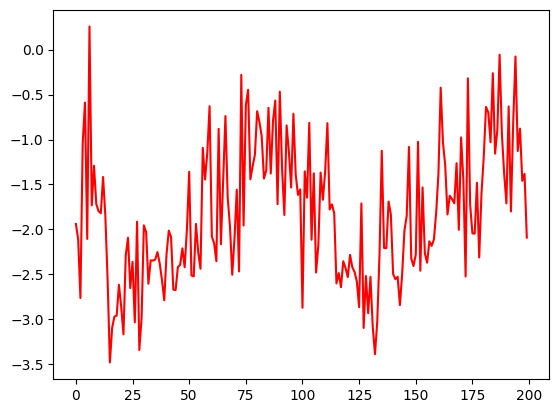

In [6]:
# loading numpy arrays (timeseries)
ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0] + '.npy', allow_pickle=True))
ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1] + '.npy', allow_pickle=True))
ts_g3 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2] + '.npy', allow_pickle=True))
ts_g4 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3] + '.npy', allow_pickle=True))
ts_g5 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4] + '.npy', allow_pickle=True))
ts_g6 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5] + '.npy', allow_pickle=True))

# calculating correlations
corr_g1 = corr_measure.fit_transform(ts_g1)
corr_g2 = corr_measure.fit_transform(ts_g2)
corr_g3 = corr_measure.fit_transform(ts_g3)
corr_g4 = corr_measure.fit_transform(ts_g4)
corr_g5 = corr_measure.fit_transform(ts_g5)
corr_g6 = corr_measure.fit_transform(ts_g6)
# Save arrays into a MATLAB-style .mat file for modularity

corr_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/'

# corr_hc.mat corr_sci.mat
savemat(corr_path + 'corr_'+group[0]+'.mat', {'corr_'+group[0]: corr_g1})
savemat(corr_path + 'corr_'+group[1]+'.mat', {'corr_'+group[1]: corr_g2})
savemat(corr_path + 'corr_'+group[2]+'.mat', {'corr_'+group[2]: corr_g3})
savemat(corr_path + 'corr_'+group[3]+'.mat', {'corr_'+group[3]: corr_g4})
savemat(corr_path + 'corr_'+group[4]+'.mat', {'corr_'+group[4]: corr_g5})
savemat(corr_path + 'corr_'+group[5]+'.mat', {'corr_'+group[5]: corr_g6})

# plot a subject's timeseries
plt.plot(np.arange(0, 200), ts_g1[0][4,:].transpose(), color='red')
plt.show()

#%% Display the mean correlation and binarized matrices

thld = 0.3

# calculate the mean correlation and binary matrices
corr_g1_mean = np.mean(corr_g1, axis=0)
corr_g2_mean = np.mean(corr_g2, axis=0)
corr_g3_mean = np.mean(corr_g3, axis=0)
corr_g4_mean = np.mean(corr_g4, axis=0)
corr_g5_mean = np.mean(corr_g5, axis=0)
corr_g6_mean = np.mean(corr_g6, axis=0)
bin_g1_mean = utils.binarize(utils.threshold_proportional(corr_g1_mean, thld, copy=True))
bin_g2_mean = utils.binarize(utils.threshold_proportional(corr_g2_mean, thld, copy=True))
bin_g3_mean = utils.binarize(utils.threshold_proportional(corr_g3_mean, thld, copy=True))
bin_g4_mean = utils.binarize(utils.threshold_proportional(corr_g4_mean, thld, copy=True))
bin_g5_mean = utils.binarize(utils.threshold_proportional(corr_g5_mean, thld, copy=True))
bin_g6_mean = utils.binarize(utils.threshold_proportional(corr_g6_mean, thld, copy=True))

# general plot settings
split = np.array([-0.5, 13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5, 199.5])
color = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D',
         '#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

In [7]:
print(f'{analysis} has ==> {len(ts_g1)}-{group[0]} & {len(ts_g2)}-{group[1]} & {len(ts_g3)}-{group[2]} & {len(ts_g4)}-{group[3]} & {len(ts_g5)}-{group[4]} & {len(ts_g6)}-{group[5]}')

ALL has ==> 14-pre_fes & 10-pre_nfes & 14-mid_fes & 10-mid_nfes & 16-post_fes & 10-post_nfes


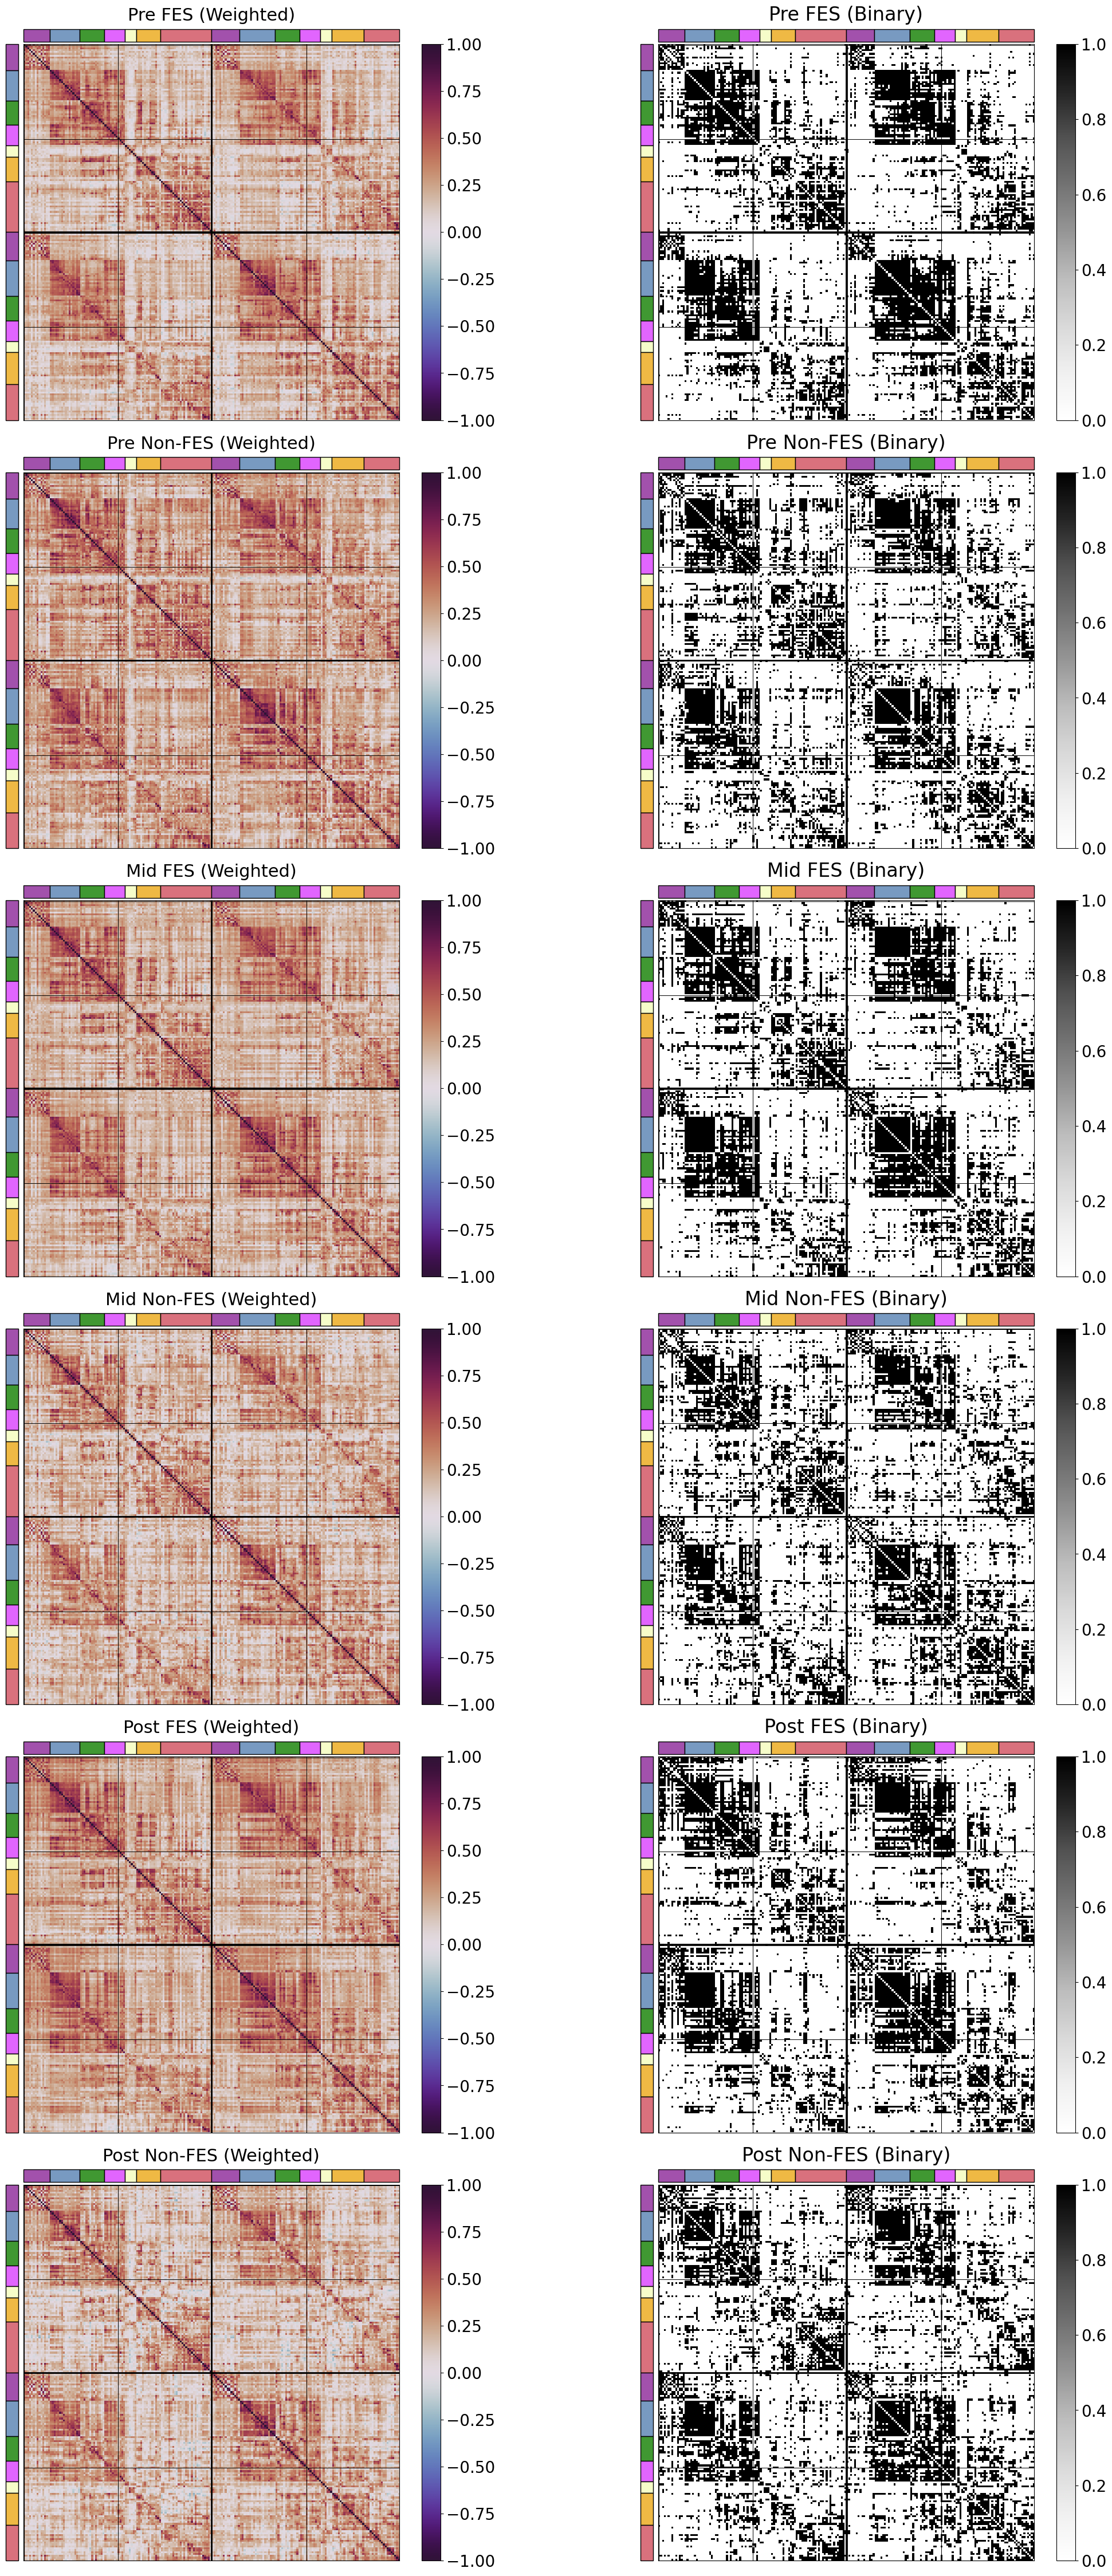

In [8]:
import matplotlib.patches as patches

# Define the number of rows and columns
nrows = 6
ncols = 2

# Create a 2-column by 6-row subplot figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 45))

# Assuming these are predefined matrices
data_matrices_weighted = [corr_g1_mean, corr_g2_mean, corr_g3_mean, corr_g4_mean, corr_g5_mean, corr_g6_mean]
data_matrices_binarized = [bin_g1_mean, bin_g2_mean, bin_g3_mean, bin_g4_mean, bin_g5_mean, bin_g6_mean]
group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']
# Loop over the rows and columns
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        
        if j == 0:  # Left column, weighted correlations
            ax.matshow(data_matrices_weighted[i], vmin=-1, vmax=1, cmap='twilight_shifted')
            ax.set_title(f'{group_label[i]} (Weighted)', fontsize=22, y=1.04)

            # Customize ticks for weighted matrix
            ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
            ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

            # Add colorbar
            cb = plt.colorbar(ax.matshow(data_matrices_weighted[i], vmin=-1, vmax=1, cmap='twilight_shifted'), ax=ax, fraction=0.03, pad=0.03)
            cb.ax.tick_params(labelsize=20)

        else:  # Right column, binarized correlations
            ax.matshow(data_matrices_binarized[i], vmin=0, vmax=1, cmap='Greys')
            ax.set_title(f'{group_label[i]} (Binary)', fontsize=24, y=1.04)

            # Customize ticks for binarized matrix
            ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
            ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

            # Add colorbar
            cb = plt.colorbar(ax.matshow(data_matrices_binarized[i], vmin=0, vmax=1, cmap='Greys'), ax=ax, fraction=0.03, pad=0.03)
            cb.ax.tick_params(labelsize=20)

        # Draw grid lines
        ax.axvline(x=100-0.5, color='k', linewidth=2)
        ax.axhline(y=100-0.5, color='k', linewidth=2)
        ax.grid(color='black', linestyle='-', linewidth=0.7)

        # Disable ticks and labels
        ax.tick_params(
            axis='both',       # changes apply to the x,y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False)  # ticks and labels along the edge are off

        # Add rectangle objects as tick labels (X axis)
        xmin, xmax, ymin, ymax = ax.axis()
        xy = split[:-1]  # anchor points
        h = (ymax - ymin) / 30
        space = h / 5
        intercept = ymax + space  # intercept
        w = split[1:] - xy  # rectangle width(s)
        for k in range(len(xy)):  # plot rectangles one-by-one
            ax.add_patch(patches.Rectangle((xy[k], intercept), width=w[k], height=h, facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

        # Add rectangle objects as tick labels (Y axis)
        width = (ymax - ymin) / 30
        h = split[1:] - xy  # rectangle height(s)
        for k in range(len(xy)):  # plot rectangles one-by-one
            ax.add_patch(patches.Rectangle((intercept + space, xy[k]), width=width, height=h[k], facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the entire figure with subplots
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_weighted_bin.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_corr_bin.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# Show the plot
plt.show()


In [9]:
# import matplotlib.patches as patches
# import matplotlib.pyplot as plt

# # Define the number of rows and columns (2 rows for weighted and binary, 3 columns for conditions)
# nrows = 2
# ncols = 2

# # Create a 2-column by 2-row subplot figure (6 subplots total)
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 15))

# # Assuming these are predefined matrices
# data_matrices_weighted = [corr_g1_mean, corr_g5_mean]  # Pre FES, Pre Non-FES, Post FES (weighted)
# data_matrices_binarized = [bin_g1_mean, bin_g5_mean]  # Pre FES, Pre Non-FES, Post FES (binary)
# group_label = ['Pre FES','Post FES']


# # Loop over the columns (conditions) and plot in two rows (Weighted in the 1st row, Binary in the 2nd row)
# for j in range(ncols):  # Loop over columns (conditions)
#     # Plot Weighted (Row 1)
#     ax = axes[0, j]
#     matrix = data_matrices_weighted[j]
#     ax.matshow(matrix, vmin=-1, vmax=1, cmap='twilight_shifted')
#     ax.set_title(f'{group_label[j]} (Weighted)', fontsize=22, y=1.04)

#     # Customize ticks for weighted matrix
#     ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
#     ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

#     # Add colorbar
#     cb = plt.colorbar(ax.matshow(matrix, vmin=-1, vmax=1, cmap='twilight_shifted'), ax=ax, fraction=0.03, pad=0.03)
#     cb.ax.tick_params(labelsize=20)

#     # Plot Binary (Row 2)
#     ax = axes[1, j]
#     matrix = data_matrices_binarized[j]
#     ax.matshow(matrix, vmin=0, vmax=1, cmap='Greys')
#     ax.set_title(f'{group_label[j]} (Binary)', fontsize=22, y=1.04)

#     # Customize ticks for binarized matrix
#     ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
#     ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

#     # Add colorbar
#     cb = plt.colorbar(ax.matshow(matrix, vmin=0, vmax=1, cmap='Greys'), ax=ax, fraction=0.03, pad=0.03)
#     cb.ax.tick_params(labelsize=20)

#     # Draw grid lines for both rows
#     for i in range(2):
#         ax = axes[i, j]
#         ax.axvline(x=100 - 0.5, color='k', linewidth=2)
#         ax.axhline(y=100 - 0.5, color='k', linewidth=2)
#         ax.grid(color='black', linestyle='-', linewidth=0.7)

#         # Disable ticks and labels for both rows
#         ax.tick_params(
#             axis='both',
#             which='both',
#             bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False)  # ticks and labels along the edge are off

#         # Add rectangle objects as tick labels (X axis)
#         xmin, xmax, ymin, ymax = ax.axis()
#         xy = split[:-1]  # anchor points
#         h = (ymax - ymin) / 30
#         space = h / 5
#         intercept = ymax + space  # intercept
#         w = split[1:] - xy  # rectangle width(s)
#         for k in range(len(xy)):
#             ax.add_patch(patches.Rectangle((xy[k], intercept), width=w[k], height=h, facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

#         # Add rectangle objects as tick labels (Y axis)
#         width = (ymax - ymin) / 30
#         h = split[1:] - xy  # rectangle height(s)
#         for k in range(len(xy)):
#             ax.add_patch(patches.Rectangle((intercept + space, xy[k]), width=width, height=h[k], facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

# # Adjust layout to avoid overlap
# plt.tight_layout()

# # Save the entire figure with subplots
# plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_weighted_binary_prepost.png',
#             bbox_inches='tight', pad_inches=0, format='png', dpi=300)
# plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_weighted_binary_prepost.pdf',
#             bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# # Show the plot
# plt.show()


In [10]:
# Perform brain network measures using bctpy (brainconn) (pip install bctpy)

#### define global measures Group 1
n_g1 = np.shape(corr_g1)[0] # number of Group 1 subjects
lam_g1 = np.zeros((n_g1,10)) # lambda (characteristic path length)
glb_g1 = np.zeros((n_g1,10)) # global efficieny
clc_g1 = np.zeros((n_g1,10)) # global clustering coefficients
tra_g1 = np.zeros((n_g1,10)) # Transitivity
ass_g1 = np.zeros((n_g1,10)) # assortativity
mod_g1 = np.zeros((n_g1,10)) # modularity

for i in range(10):
    thld = np.float32((i+1)*0.05)    
    # matrix binarization
    bin_g1 = np.zeros(np.shape(corr_g1))
    for k in range(n_g1):
        bin_g1[k] = utils.binarize(utils.threshold_proportional(corr_g1[k], thld, copy=True))   
    # compute global measures group1
    for k in range(n_g1):                
        dis = distance.distance_bin(bin_g1[k]) # TIME CONSUMING  
        lam_g1[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[0]
        glb_g1[k,i] = distance.charpath(dis, include_diagonal=False, include_infinite=False)[1]
        clc_g1[k,i] = np.mean(clustering.clustering_coef_bu(bin_g1[k]))
        tra_g1[k,i] = np.mean(clustering.transitivity_bu(bin_g1[k]))
        ass_g1[k,i] = core.assortativity_bin(bin_g1[k], flag=0) # 0: undirected graph
        mod_g1[k,i] = modularity.modularity_louvain_und(bin_g1[k], gamma=1.0, hierarchy=False, seed=None)[1]     
    print(thld)
    

0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5


### Community label assignment

In [11]:
# #%% consensus community structure lee approach within individual/across individual 
# # 200xn 
n_set = 2
S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g1_gamma1.2,-1.0.mat', squeeze_me=True)['N_all_g1']; 
S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_indivi_g2_gamma1.2,-1.0.mat', squeeze_me=True)['N_all_g2']; 
 
# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_group_g1_gamma1.2,-1.0.mat', squeeze_me=True)['N_all_group_g1']; 
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_group_g2_gamma1.2,-1.0.mat', squeeze_me=True)['N_all_group_g2']; 
communities = [S_g1, S_g2]

In [25]:
# N = S_g1.shape[0] # num of nodes
# C = S_g1.shape[1] # num of subjs

In [18]:
# # our approach community structure
# S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_prefes_1.2,-1.0.mat', squeeze_me=True)['S_g1']; 
# S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S_postfes_1.2,-1.0.mat', squeeze_me=True)['S_g2']; 
# communities = [S_g1, S_g2]


In [19]:
group_label = ['Pre FES', 'Post FES']

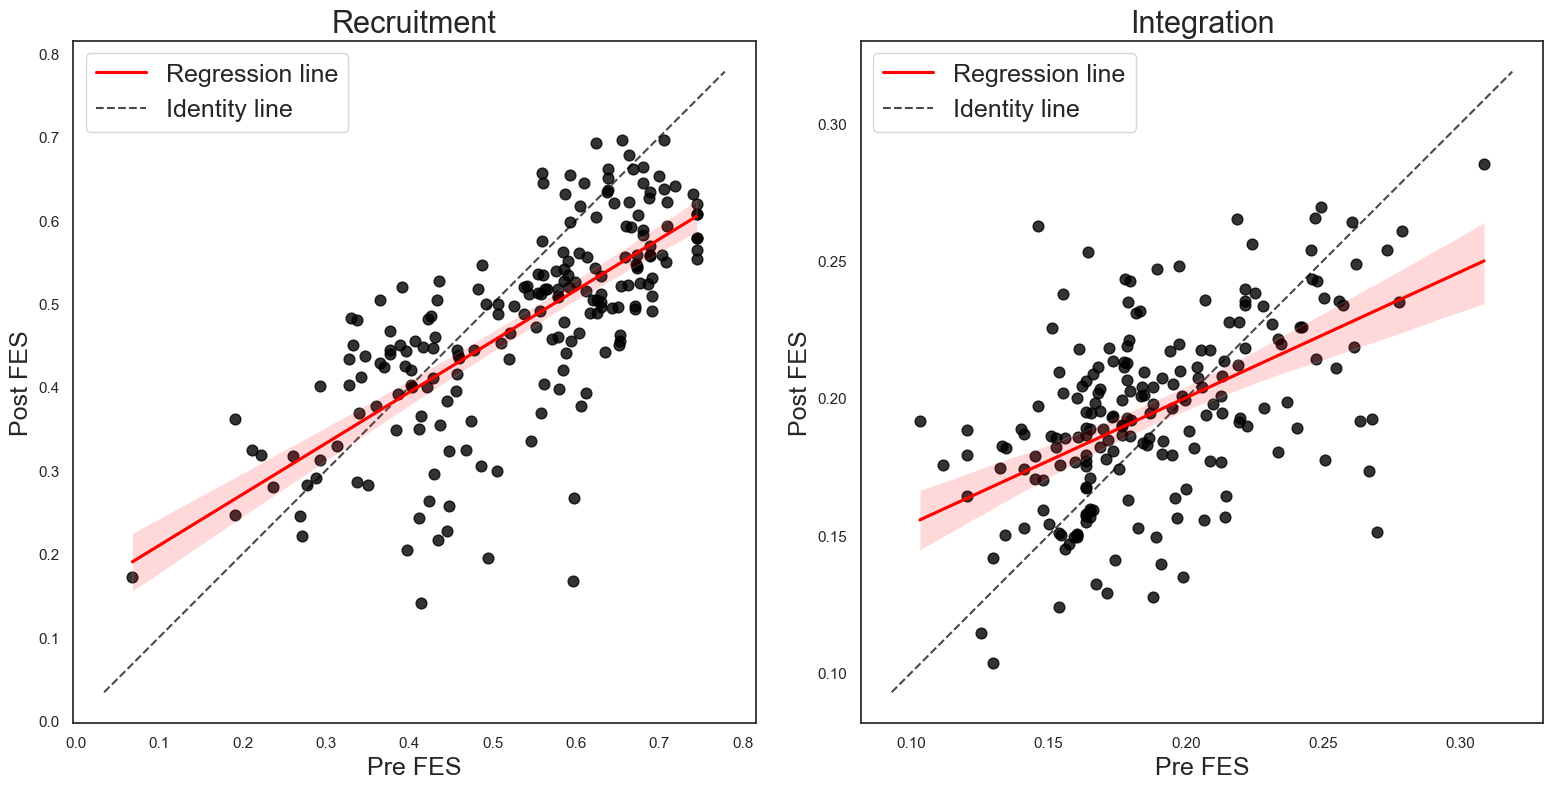

In [20]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# create static communities (networks' labels)
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
static_communities = np.zeros((200,))
# find networks in atlas.labels and assign a label[1-7] to each
for i, network in enumerate(networks):   
    idx = np.array([network in s for s in labels], dtype=bool)
    static_communities[idx] = i+1 # 1-7

allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
allegiance_coarse = []

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]]) # Any override variable  ?

def create_coarse_allegiance(allegiance):
    allegiance_coarse_lr = np.zeros((14,14))
    p1, q1 = 0, 0
    for i, p2 in enumerate(pivot):
        for j, q2 in enumerate(pivot):
            allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
            q1 = q2+1
        p1 = p2+1
        q1 = 0    
    # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
    allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
    return allegiance_coarse

for s in range(n_set):
    
    allegiance.append(communitymeasures.allegiance(communities[s]))  
    flexibility.append(communitymeasures.flexibility(communities[s]))
    integration.append(communitymeasures.integration(communities[s], static_communities))
    recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
    promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
    allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))
        
#plt.imshow(allegiance_coarse[1])
#plt.colorbar()

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc): 
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc


#%% plot regressions (scatter)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))  # Adjusted figsize for 1 row by 2 columns
sns.set(style='white')  # whitegrid

# recruitment
x_rec = recruitment[0]
y_rec = recruitment[1]
sns.regplot(x=x_rec, y=y_rec, ci=95, scatter_kws={"color": "black", "s": 60}, 
            line_kws={"color": "red", 'label': 'Regression line'}, ax=ax1)
ax1.set_xlabel(group_label[0], fontsize=18)
ax1.set_ylabel(group_label[1], fontsize=18)
ax1.set_title('Recruitment', fontsize=22)
lims = [np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()])]  # max of both axes
ax1.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
ax1.axis('square')  # scaled, equal, square
# ax1.collections[1].set_label('95% CI')
ax1.legend(loc="best", fontsize=18)
perm_test(x_rec, y_rec, 30000)

# integration
x_in = integration[0]
y_in = integration[1]
sns.regplot(x=x_in, y=y_in, ci=95, scatter_kws={"color": "black", "s": 60}, 
            line_kws={"color": "red", 'label': 'Regression line'}, ax=ax2)
y_min, y_max = ax2.get_ylim()
x_min, x_max = ax2.get_xlim()
ax2.set_xlabel(group_label[0], fontsize=18)
ax2.set_ylabel(group_label[1], fontsize=18)
ax2.set_title('Integration', fontsize=22)
lims = [np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
        np.max([ax2.get_xlim(), ax2.get_ylim()])]  # max of both axes
ax2.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
ax2.axis('square')  # scaled, equal, square
# ax2.collections[1].set_label('95% CI')
ax2.legend(loc="best", fontsize=18)
perm_test(x_in, y_in, 30000)

plt.tight_layout(pad=2.0)  # spacing between subplots
plt.show()


# fig.savefig('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/fig/scatter_int&rec'+analysis+'.pdf',
#             bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/recruitment_control.npy', recruitment[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_GraphTheory/sci_data/SCI/integration_control.npy', integration[0])
 


In [21]:
# #%% finding significant (diff_integration)
# # -----------------------------------------
# #%% define permutation test on integration/recruitment

def perm_test_integration(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    int_s1 = communitymeasures.integration(s1, static_communities)
    int_s2 = communitymeasures.integration(s2, static_communities)
    diff = np.abs(int_s2 - int_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        int_sp1 = communitymeasures.integration(sp1, static_communities)
        int_sp2 = communitymeasures.integration(sp2, static_communities)
        k += diff < np.abs(int_sp2 - int_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

def perm_test_recruitment(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    rec_s1 = communitymeasures.recruitment(s1, static_communities)
    rec_s2 = communitymeasures.recruitment(s2, static_communities)
    diff = np.abs(rec_s2 - rec_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
        rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
        k += diff < np.abs(rec_sp2 - rec_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

# # run for a given permutation number (nmc)  
pvalue_int = perm_test_integration(S_g1, S_g2, nmc=100) ## Int PreFES - PostFES 
pvalue_rec = perm_test_recruitment(S_g1, S_g2, nmc=100) ## ## Rec PreFES - PostFES 

 

# # Automatic atlas fetching
# atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
# atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]
# label = atlas.labels.astype('U') # covert array of bytes to array of strings

# color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*17) + (['red']*19)

permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90


0
1
2
3
4
5
6
7
8
9
permutation #:  0
permutation #:  0
permutation #:  10
permutation #:  20
permutation #:  30
permutation #:  40
permutation #:  50
permutation #:  60
permutation #:  70
permutation #:  80
permutation #:  90
permutation #:  100
permutation #:  110
permutation #:  120
permutation #:  130
permutation #:  140
permutation #:  150
permutation #:  160
permutation #:  170
permutation #:  180
permutation #:  190
permutation #:  200
permutation #:  210
permutation #:  220
permutation #:  230
permutation #:  240
permutation #:  250
permutation #:  260
permutation #:  270
permutation #:  280
permutation #:  290
permutation #:  300
permutation #:  310
permutation #:  320
permutation #:  330
permutation #:  340
permutation #:  350
permutation #:  360
permutation #:  370
permutation #:  380
permutation #:  390
permutation #:  400
permutation #:  410
permutation #:  420
permutation #:  430
permutation #:  440
permutation #:  450
permutation #:  460
permutation #:  470
permutation #

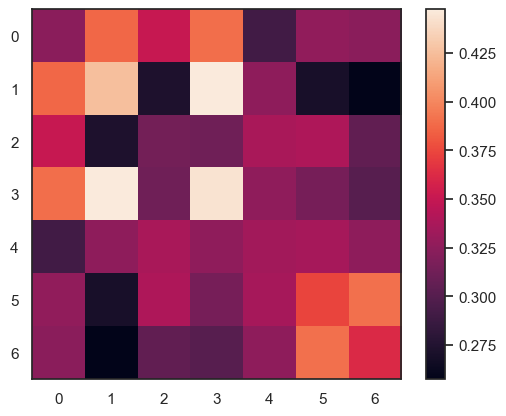

In [22]:
#%% MODULARITY + permutation -> create null distribution

# number of permutations
n_perm = 10

# create list of list for modularity variables (e.g., allegiance ...)
allegiance_perm = flexibility_perm = integration_perm = recruitment_perm = [[] for i in range(n_perm)]

for i in range(n_perm):
    
    # permute/shuffle community assignment among both groups
    S_perm = np.random.permutation(np.concatenate((S_g1, S_g2), axis=1).T).T
    S_perm_g1 = S_perm[:,:np.shape(S_g1)[1]]
    S_perm_g2 = S_perm[:,np.shape(S_g1)[1]:]
    communities_perm = [S_perm_g1, S_perm_g2]
    
    for s in range(n_set):
        
        allegiance_perm[i].append(communitymeasures.allegiance(communities_perm[s]))  
        #flexibility_perm[i].append(communitymeasures.flexibility(communities_perm[s]))
        #integration_perm[i].append(communitymeasures.integration(communities_perm[s], static_communities))
        #recruitment_perm[i].append(communitymeasures.recruitment(communities_perm[s], static_communities))
        
    print(i)

#%% define permutation test on allegiance matrices using monte-carlo method
def perm_test_allegiance(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    diff = np.abs(alg_s2 - alg_s1)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T 
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        k += diff < np.abs(alg_sp2 - alg_sp1)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc

def perm_test_allegiance_coarse(s1, s2, nmc):
    n, k = np.shape(s1)[1], 0
    alg_s1 = communitymeasures.allegiance(s1)
    alg_s2 = communitymeasures.allegiance(s2)
    alg_s1_coarse = create_coarse_allegiance(alg_s1)
    alg_s2_coarse = create_coarse_allegiance(alg_s2)
    diff = np.abs(alg_s2_coarse - alg_s1_coarse)
    for i in range(nmc): # permute/shuffle community assignment among both groups
        sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
        sp1, sp2 = sp[:,:n], sp[:,n:]
        alg_sp1 = communitymeasures.allegiance(sp1)
        alg_sp2 = communitymeasures.allegiance(sp2)
        alg_sp1_coarse = create_coarse_allegiance(alg_sp1)
        alg_sp2_coarse = create_coarse_allegiance(alg_sp2)
        k += diff < np.abs(alg_sp2_coarse - alg_sp1_coarse)
        if i % 10 == 0:
            print('permutation #: ', i) 
    return k / nmc





# run for a given permutation number (nmc)
pvalue = perm_test_allegiance(S_g1, S_g2, nmc=10)  
pvalue_c = perm_test_allegiance_coarse(S_g1, S_g2, nmc=1000)


# pvalue = perm_test_allegiance_parallel(S_g1, S_g2, nmc=10) # another pvalue var exist ?
# pvalue_c = perm_test_allegiance_coarse_parallel(S_g1, S_g2, nmc=1000)

pvalue_lr = np.zeros((14,14))
pvalue_coarse = np.zeros((7,7))

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]])

# create coarse allegiance metrices
p1, q1 = 0, 0
for i, p2 in enumerate(pivot): 
    for j, q2 in enumerate(pivot): 
        pvalue_lr[i,j] = np.nanmean(pvalue[p1:p2+1, q1:q2+1])
        q1 = q2+1
    p1 = p2+1
    q1 = 0
    
# If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
pvalue_coarse = np.mean(pvalue_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)    
    
# #%%
# pvalue_int = perm_test_integration(S_g1, S_g2, nmc=100)
# # pvalue_int = perm_test_integration_parallel(S_g1, S_g2, nmc=100, static_communities)

plt.imshow(pvalue_coarse)
plt.colorbar()

#%%


### Allegiance matrix plots

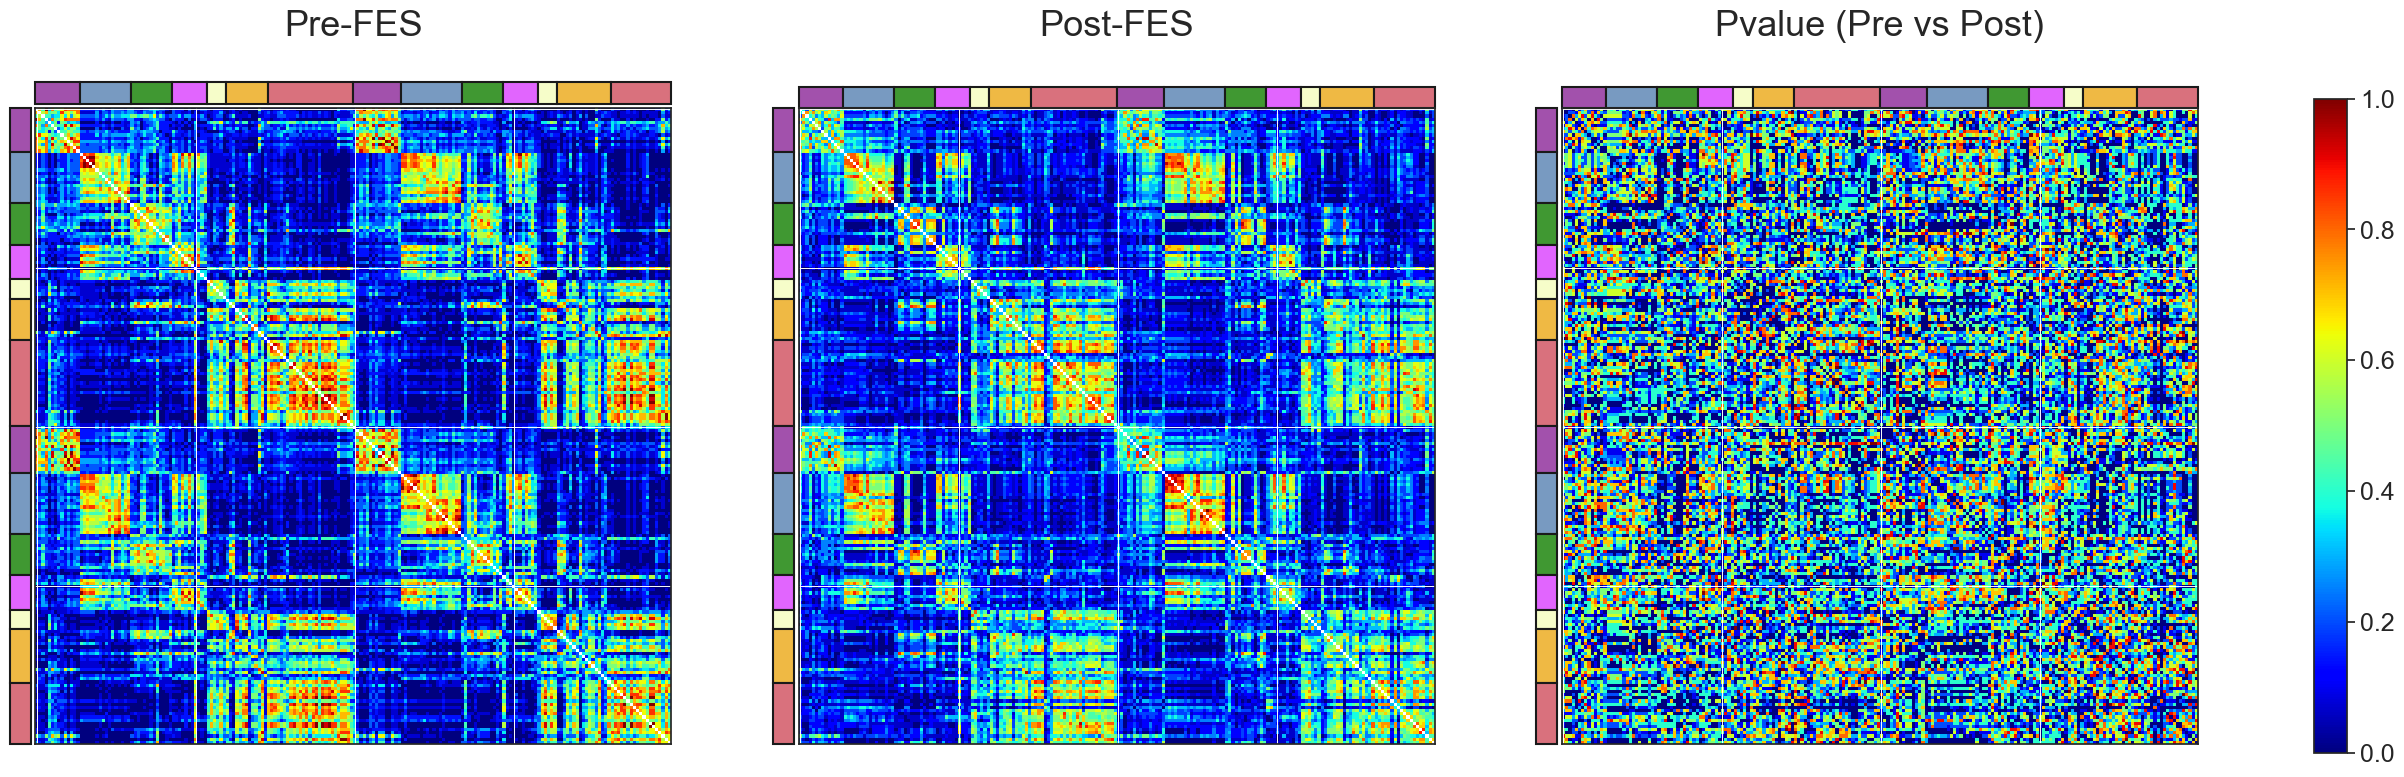

In [23]:
cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
allegiance = [allegiance[0], allegiance[1], pvalue]
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix
# plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
im1 = axs[0].matshow(allegiance[0], vmin=0, vmax=1, cmap=cmap)
axs[0].set_title('Pre-FES', fontsize=26, y=1.1)

# Plot the second matrix
im2 = axs[1].matshow(allegiance[1], vmin=0, vmax=1, cmap=cmap)
axs[1].set_title('Post-FES', fontsize=26, y=1.1)

# Plot the third matrix
im3 = axs[2].matshow(allegiance[2], vmin=0, vmax=1, cmap=cmap)
axs[2].set_title('Pvalue (Pre vs Post)', fontsize=26, y=1.1)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

In [24]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:18:19.366005


In [27]:
# import pkg_resources

# installed_packages = pkg_resources.working_set
# for package in installed_packages:
#     print(f"{package.key}=={package.version}")